In [1]:
import os
import sys

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.model_running import get_run_number, run_model
from models.xception import get_basic_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized_and_normalized')
MODEL_NAME_BASE = 'xception_5_samplewise_centering'

In [3]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
251/251 [==============================] - ETA: 0s - loss: 1.1513 - categorical cross entropy: 1.1513 - mean squared error: 0.0651 - accuracy: 0.6771 - auc: 0.7582 - prc: 0.2440

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_1\assets


251/251 [==============================] - 72s 251ms/step - loss: 1.1513 - categorical cross entropy: 1.1513 - mean squared error: 0.0651 - accuracy: 0.6771 - auc: 0.7582 - prc: 0.2440 - val_loss: 0.9862 - val_categorical cross entropy: 0.9862 - val_mean squared error: 0.0554 - val_accuracy: 0.7035 - val_auc: 0.8408 - val_prc: 0.3452 - lr: 0.0010
Epoch 2/100
251/251 [==============================] - ETA: 0s - loss: 0.8045 - categorical cross entropy: 0.8045 - mean squared error: 0.0543 - accuracy: 0.7169 - auc: 0.8644 - prc: 0.3599

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_2\assets


251/251 [==============================] - 62s 247ms/step - loss: 0.8045 - categorical cross entropy: 0.8045 - mean squared error: 0.0543 - accuracy: 0.7169 - auc: 0.8644 - prc: 0.3599 - val_loss: 0.8718 - val_categorical cross entropy: 0.8718 - val_mean squared error: 0.0614 - val_accuracy: 0.6700 - val_auc: 0.8642 - val_prc: 0.4049 - lr: 0.0010
Epoch 3/100
251/251 [==============================] - ETA: 0s - loss: 0.7504 - categorical cross entropy: 0.7504 - mean squared error: 0.0515 - accuracy: 0.7374 - auc: 0.8804 - prc: 0.4364

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_3\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_3\assets


251/251 [==============================] - 62s 247ms/step - loss: 0.7504 - categorical cross entropy: 0.7504 - mean squared error: 0.0515 - accuracy: 0.7374 - auc: 0.8804 - prc: 0.4364 - val_loss: 0.8176 - val_categorical cross entropy: 0.8176 - val_mean squared error: 0.0500 - val_accuracy: 0.7420 - val_auc: 0.8921 - val_prc: 0.5118 - lr: 0.0010
Epoch 4/100
251/251 [==============================] - ETA: 0s - loss: 0.6730 - categorical cross entropy: 0.6730 - mean squared error: 0.0476 - accuracy: 0.7575 - auc: 0.9064 - prc: 0.4989

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_4\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_4\assets


251/251 [==============================] - 62s 248ms/step - loss: 0.6730 - categorical cross entropy: 0.6730 - mean squared error: 0.0476 - accuracy: 0.7575 - auc: 0.9064 - prc: 0.4989 - val_loss: 0.6739 - val_categorical cross entropy: 0.6739 - val_mean squared error: 0.0465 - val_accuracy: 0.7650 - val_auc: 0.9115 - val_prc: 0.5880 - lr: 0.0010
Epoch 5/100
251/251 [==============================] - 50s 198ms/step - loss: 0.6447 - categorical cross entropy: 0.6447 - mean squared error: 0.0459 - accuracy: 0.7698 - auc: 0.9171 - prc: 0.5315 - val_loss: 0.7726 - val_categorical cross entropy: 0.7726 - val_mean squared error: 0.0488 - val_accuracy: 0.7475 - val_auc: 0.9017 - val_prc: 0.5483 - lr: 0.0010
Epoch 6/100
251/251 [==============================] - 50s 198ms/step - loss: 0.6972 - categorical cross entropy: 0.6972 - mean squared error: 0.0482 - accuracy: 0.7573 - auc: 0.9027 - prc: 0.5146 - val_loss: 0.8077 - val_categorical cross entropy: 0.8077 - val_mean squared error: 0.0507 -

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_7\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_7\assets


251/251 [==============================] - 63s 251ms/step - loss: 0.6717 - categorical cross entropy: 0.6717 - mean squared error: 0.0473 - accuracy: 0.7642 - auc: 0.9084 - prc: 0.5085 - val_loss: 0.6100 - val_categorical cross entropy: 0.6100 - val_mean squared error: 0.0437 - val_accuracy: 0.7830 - val_auc: 0.9184 - val_prc: 0.6303 - lr: 0.0010
Epoch 8/100
251/251 [==============================] - 50s 198ms/step - loss: 0.6156 - categorical cross entropy: 0.6156 - mean squared error: 0.0439 - accuracy: 0.7785 - auc: 0.9242 - prc: 0.5872 - val_loss: 0.6317 - val_categorical cross entropy: 0.6317 - val_mean squared error: 0.0445 - val_accuracy: 0.7765 - val_auc: 0.9236 - val_prc: 0.6377 - lr: 0.0010
Epoch 9/100
251/251 [==============================] - 50s 199ms/step - loss: 0.6063 - categorical cross entropy: 0.6063 - mean squared error: 0.0433 - accuracy: 0.7868 - auc: 0.9250 - prc: 0.5985 - val_loss: 0.6137 - val_categorical cross entropy: 0.6137 - val_mean squared error: 0.0426 -

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_17\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_17\assets


251/251 [==============================] - 62s 248ms/step - loss: 0.5862 - categorical cross entropy: 0.5862 - mean squared error: 0.0422 - accuracy: 0.7900 - auc: 0.9332 - prc: 0.6475 - val_loss: 0.5929 - val_categorical cross entropy: 0.5929 - val_mean squared error: 0.0420 - val_accuracy: 0.7955 - val_auc: 0.9382 - val_prc: 0.6926 - lr: 0.0010
Epoch 18/100
251/251 [==============================] - 50s 198ms/step - loss: 0.5632 - categorical cross entropy: 0.5632 - mean squared error: 0.0408 - accuracy: 0.7965 - auc: 0.9373 - prc: 0.6554 - val_loss: 0.6264 - val_categorical cross entropy: 0.6264 - val_mean squared error: 0.0442 - val_accuracy: 0.7740 - val_auc: 0.9274 - val_prc: 0.6631 - lr: 0.0010
Epoch 19/100
251/251 [==============================] - 50s 198ms/step - loss: 0.5393 - categorical cross entropy: 0.5393 - mean squared error: 0.0395 - accuracy: 0.8024 - auc: 0.9431 - prc: 0.6789 - val_loss: 0.6749 - val_categorical cross entropy: 0.6749 - val_mean squared error: 0.0488

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_21\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_21\assets


251/251 [==============================] - 62s 249ms/step - loss: 0.5135 - categorical cross entropy: 0.5135 - mean squared error: 0.0377 - accuracy: 0.8160 - auc: 0.9495 - prc: 0.7040 - val_loss: 0.5627 - val_categorical cross entropy: 0.5627 - val_mean squared error: 0.0401 - val_accuracy: 0.8010 - val_auc: 0.9324 - val_prc: 0.6928 - lr: 0.0010
Epoch 22/100
251/251 [==============================] - 50s 199ms/step - loss: 0.4956 - categorical cross entropy: 0.4956 - mean squared error: 0.0365 - accuracy: 0.8186 - auc: 0.9520 - prc: 0.7361 - val_loss: 0.6131 - val_categorical cross entropy: 0.6131 - val_mean squared error: 0.0411 - val_accuracy: 0.8035 - val_auc: 0.9391 - val_prc: 0.7023 - lr: 0.0010
Epoch 23/100
251/251 [==============================] - 50s 199ms/step - loss: 0.5060 - categorical cross entropy: 0.5060 - mean squared error: 0.0370 - accuracy: 0.8147 - auc: 0.9515 - prc: 0.7239 - val_loss: 0.6492 - val_categorical cross entropy: 0.6492 - val_mean squared error: 0.0465

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_33\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_5_samplewise_centering_20_33\assets


251/251 [==============================] - 63s 252ms/step - loss: 0.3995 - categorical cross entropy: 0.3995 - mean squared error: 0.0301 - accuracy: 0.8533 - auc: 0.9696 - prc: 0.8277 - val_loss: 0.5528 - val_categorical cross entropy: 0.5528 - val_mean squared error: 0.0386 - val_accuracy: 0.8150 - val_auc: 0.9308 - val_prc: 0.7352 - lr: 9.5000e-04
Epoch 34/100
251/251 [==============================] - 50s 200ms/step - loss: 0.3989 - categorical cross entropy: 0.3989 - mean squared error: 0.0303 - accuracy: 0.8532 - auc: 0.9670 - prc: 0.8104 - val_loss: 0.7466 - val_categorical cross entropy: 0.7466 - val_mean squared error: 0.0446 - val_accuracy: 0.7950 - val_auc: 0.8940 - val_prc: 0.6469 - lr: 9.5000e-04
Epoch 35/100
251/251 [==============================] - 50s 199ms/step - loss: 0.3859 - categorical cross entropy: 0.3859 - mean squared error: 0.0290 - accuracy: 0.8596 - auc: 0.9699 - prc: 0.8310 - val_loss: 0.6822 - val_categorical cross entropy: 0.6822 - val_mean squared error

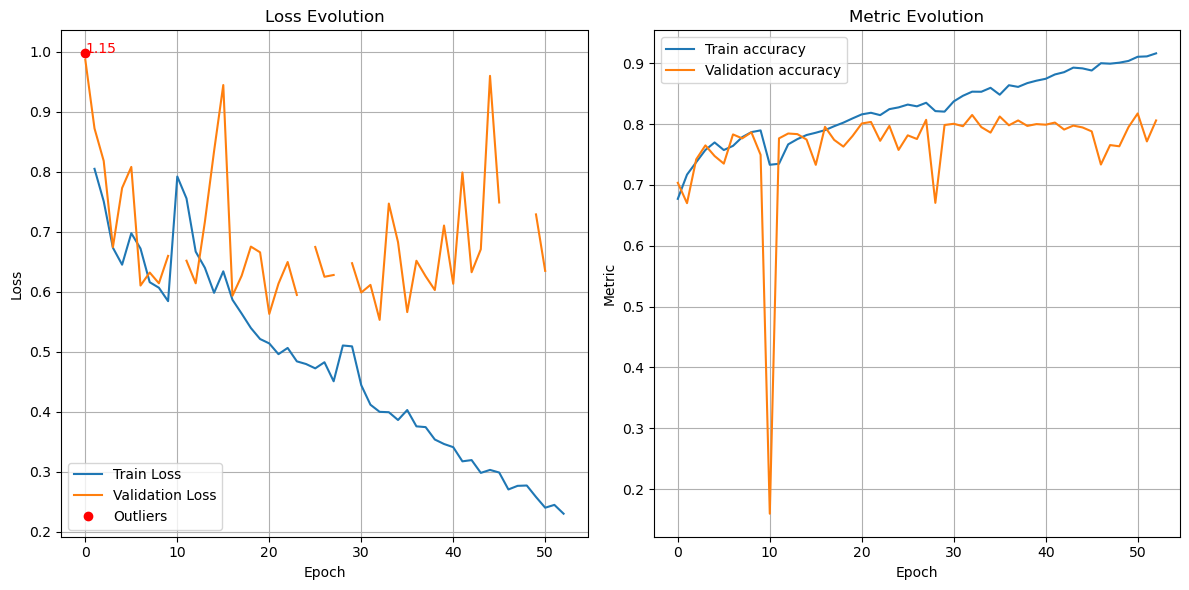

(<keras.engine.functional.Functional at 0x2517d737970>,
 <keras.callbacks.History at 0x25177360cd0>)

In [4]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
        lambda: get_basic_model(
            HEIGHT,
            WIDTH,
            num_classes,
            metrics=METRICS),
    get_augmentation_layers)